# NFL Defense Data Nunnelee Notebook

This competition uses NFL’s Next Gen Stats data, which includes the position and speed of every player on the field during each play. We'll employ player tracking data for all drop-back pass plays from the 2018 regular season. The goal of submissions is to identify unique and impactful approaches to measure defensive performance on these plays. There are several different directions for participants to utilize —which may require levels of football savvy, data aptitude, and creativity. As examples:

* What are coverage schemes (man, zone, etc) that the defense employs? What coverage options tend to be better performing?
* Which players are the best at closely tracking receivers as they try to get open?
* Which players are the best at closing on receivers when the ball is in the air?
* Which players are the best at defending pass plays when the ball arrives?
* Is there any way to use player tracking data to predict whether or not certain penalties – for example, defensive pass interference – will be called?
* Who are the NFL’s best players against the pass?
* How does a defense react to certain types of offensive plays?
* Is there anything about a player – for example, their height, weight, experience, speed, or position – that can be used to predict their performance on defense?
* What does data tell us about defending the pass play?

# Evaulation
The challenge is to generate actionable, practical, and novel insights from player tracking data that corresponds to defensive backs. Suggestions made here represent some of the approaches that football coaches are currently thinking of, but there undoubtedly several others.

An entry to the competition consists of a Notebook submission that is evaluated on the following five components, where 0 is the low score and 10 is the high score.

Note: All notebooks submitted must be made public on or before the submission deadline to be eligible.

Open Competition: The first aim takes on what an NFL defense does once a quarterback drops back to pass. This includes coverage schemes (typically man versus zone), how players (often termed “secondary” defenders) disrupt and prevent the offense from completing passes, and how, once the ball is in the air, the defense works to ensure that a pass falls incomplete.

## Big Data Bowl 2021 scoring sheet
Submissions will be judged by the NFL based on how well they address:

Innovation:

Are the proposed findings actionable?
Is this a way of looking at tracking data that is novel?
Is this project creative?
Accuracy:

Is the work correct?
Are claims backed up by data?
Are the statistical models appropriate given the data?
Relevance:

Would NFL teams (or the league office) be able to use these results on a week-to-week basis?
Does the analysis account for variables that make football data complex?
Clarity:

Evaluate the writing with respect to how clear the writer(s) make findings.
Data visualization/tables:

Are the charts and tables provided accessible, interesting, visually appealing, and accurate?

Notebooks should consist of no more than 2,000 words and no more than 7 tables/figures. Submissions will not be penalized for any number of words or figures under this limit. Participants are encouraged to show statistical code if it helps readers better understand their analyses; most, if not all code, however, should be hidden in the Appendix.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2021/plays.csv
/kaggle/input/nfl-big-data-bowl-2021/week10.csv
/kaggle/input/nfl-big-data-bowl-2021/week4.csv
/kaggle/input/nfl-big-data-bowl-2021/week15.csv
/kaggle/input/nfl-big-data-bowl-2021/week3.csv
/kaggle/input/nfl-big-data-bowl-2021/week13.csv
/kaggle/input/nfl-big-data-bowl-2021/week1.csv
/kaggle/input/nfl-big-data-bowl-2021/week7.csv
/kaggle/input/nfl-big-data-bowl-2021/week12.csv
/kaggle/input/nfl-big-data-bowl-2021/week9.csv
/kaggle/input/nfl-big-data-bowl-2021/players.csv
/kaggle/input/nfl-big-data-bowl-2021/week5.csv
/kaggle/input/nfl-big-data-bowl-2021/week16.csv
/kaggle/input/nfl-big-data-bowl-2021/week17.csv
/kaggle/input/nfl-big-data-bowl-2021/week6.csv
/kaggle/input/nfl-big-data-bowl-2021/week8.csv
/kaggle/input/nfl-big-data-bowl-2021/week14.csv
/kaggle/input/nfl-big-data-bowl-2021/games.csv
/kaggle/input/nfl-big-data-bowl-2021/week2.csv
/kaggle/input/nfl-big-data-bowl-2021/week11.csv


# Preparing the tools
We're going to use Matplotlib, as well as Numpy and Pandas

In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load the data
There is a lot of data bases. Player information, plays, games and plays for weeks 1 - 17. 

Let's start by consolidating weeks 1-16. This will create a large database, but create more relevance. Week 17 will be our test data set.

In [3]:
df_wk1 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week1.csv")
#df_wk2 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week2.csv")
#df_wk3 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week3.csv")
#df_wk4 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week4.csv")
#df_wk5 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week5.csv")
#df_wk6 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week6.csv")
#df_wk7 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week7.csv")
#df_wk8 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week8.csv")
#df_wk9 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week9.csv")
#df_wk10 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week10.csv")
#df_wk11 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week11.csv")
#df_wk12 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week12.csv")
#df_wk13 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week13.csv")
#df_wk14 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week14.csv")
#df_wk15 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week15.csv")
#df_wk16 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week16.csv")
#df_test = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week17.csv")

In [4]:
# Let's add the databases together
#df_wks = df_wk1 + df_wk2 + df_wk3 + df_wk4 + df_wk5 + df_wk6 + df_wk7 + df_wk8 + df_wk9 + df_wk10 + df_wk11 + df_wk12 + df_wk13 + df_wk14 + df_wk15 + df_wk16
#df_wks.info()

In [4]:
df_wk1.head().T

,0,1,2,3,4
time,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z
x,91.73,88.89,91.35,86.31,90.78
y,26.67,36.47,44.16,22.01,36.15
s,0,0.01,0.02,0.09,0
a,0.01,0.01,0.03,0.42,0
dis,0.02,0.01,0.01,0.01,0
o,289.57,105.63,290.45,70.12,257.61
dir,240.93,66.66,16.86,168.91,193.97
event,None,None,None,None,None
nflId,310,79848,2.49545e+06,2.49561e+06,2.53304e+06


## Let's see what the other data holds

In [5]:
df_games = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/games.csv")
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           253 non-null    int64 
 1   gameDate         253 non-null    object
 2   gameTimeEastern  253 non-null    object
 3   homeTeamAbbr     253 non-null    object
 4   visitorTeamAbbr  253 non-null    object
 5   week             253 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 12.0+ KB


In [6]:
df_games.head().T

,0,1,2,3,4
gameId,2018090600,2018090901,2018090902,2018090903,2018090900
gameDate,09/06/2018,09/09/2018,09/09/2018,09/09/2018,09/09/2018
gameTimeEastern,20:20:00,13:00:00,13:00:00,13:00:00,13:00:00
homeTeamAbbr,PHI,CLE,IND,MIA,BAL
visitorTeamAbbr,ATL,PIT,CIN,TEN,BUF
week,1,1,1,1,1


In [7]:
df_players = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/players.csv")
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


In [8]:
df_players.head().T

,0,1,2,3,4
nflId,2539334,2539653,2543850,2555162,2555255
height,72,70,69,73,75
weight,190,186,186,227,232
birthDate,1990-09-10,1988-11-01,1991-12-18,1994-11-04,1993-07-01
collegeName,Washington,Southeastern Louisiana,Purdue,Louisiana State,Minnesota
position,CB,CB,SS,MLB,OLB
displayName,Desmond Trufant,Robert Alford,Ricardo Allen,Deion Jones,De'Vondre Campbell


In [9]:
df_plays = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/plays.csv")
df_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

In [10]:
df_plays.head().T

,0,1,2,3,4
gameId,2018090600,2018090600,2018090600,2018090600,2018090600
playId,75,146,168,190,256
playDescription,(15:00) M.Ryan pass short right to J.Jones pus...,(13:10) M.Ryan pass incomplete short right to ...,(13:05) (Shotgun) M.Ryan pass incomplete short...,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,(10:59) (Shotgun) M.Ryan pass incomplete short...
quarter,1,1,1,1,1
down,1,1,2,3,3
yardsToGo,15,10,10,10,1
possessionTeam,ATL,ATL,ATL,ATL,ATL
playType,play_type_pass,play_type_pass,play_type_pass,play_type_pass,play_type_pass
yardlineSide,ATL,PHI,PHI,PHI,PHI
yardlineNumber,20,39,39,39,1


# Data Analysis
The results per play is in the Plays data.

Let's break down the play results first. Succesful Completion (C) and Defensive Penalties (DPI, DH, ICT) = Positive for offense. All other results are positives for defense.

In [11]:
df_plays.tail().T

,19234,19235,19236,19237,19238
gameId,2018122200,2018122200,2018122201,2018122201,2018122201
playId,2300,3177,566,1719,2649
playDescription,(7:53) J.Johnson pass incomplete short left [K...,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,(5:32) (Shotgun) P.Rivers pass deep right to K...,(1:08) P.Rivers pass incomplete deep middle to...,(7:16) (Shotgun) L.Jackson pass incomplete sho...
quarter,3,4,1,2,3
down,2,3,3,3,1
yardsToGo,5,7,4,1,10
possessionTeam,WAS,TEN,LAC,LAC,BAL
playType,play_type_unknown,play_type_unknown,play_type_unknown,play_type_unknown,play_type_unknown
yardlineSide,WAS,WAS,LAC,LAC,LAC
yardlineNumber,31,37,49,48,49


## Question: What is relevant? Narrow the focus.
### First, let's identify the relevant info:
* playResult: Was the offense succesful in completing a pass without an offensive penalty?
* passResult: Outcome of the passing play (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, text)
* And what worked for the defense?

### Second, let's assume this is the only relevant info in determining the results for our questions.
* down
* yardsToGo
* personnelIO
* personnelID
* defendersInTheBox
* penalties? Maybe, maybe not.

### Third, let's see if we can seperate the passResult Completions from all other passResults, and create a database with only the relevant information.

In [12]:
# Lets look at our current database
df_plays.head().T

,0,1,2,3,4
gameId,2018090600,2018090600,2018090600,2018090600,2018090600
playId,75,146,168,190,256
playDescription,(15:00) M.Ryan pass short right to J.Jones pus...,(13:10) M.Ryan pass incomplete short right to ...,(13:05) (Shotgun) M.Ryan pass incomplete short...,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,(10:59) (Shotgun) M.Ryan pass incomplete short...
quarter,1,1,1,1,1
down,1,1,2,3,3
yardsToGo,15,10,10,10,1
possessionTeam,ATL,ATL,ATL,ATL,ATL
playType,play_type_pass,play_type_pass,play_type_pass,play_type_pass,play_type_pass
yardlineSide,ATL,PHI,PHI,PHI,PHI
yardlineNumber,20,39,39,39,1


In [13]:
# Let's drop the assumed irrelevant info
df_plays_rel = df_plays.drop(["gameId", "playId", "playDescription", "quarter","possessionTeam", "playType",
                             "yardlineSide","yardlineNumber", "offenseFormation", "numberOfPassRushers",
                             "typeDropback", "preSnapVisitorScore", "preSnapHomeScore", "gameClock", 
                             "absoluteYardlineNumber","penaltyCodes", "penaltyJerseyNumbers","offensePlayResult",
                             "epa", "isDefensivePI"], axis=1)
df_plays_rel.head().T

,0,1,2,3,4
down,1,1,2,3,3
yardsToGo,15,10,10,10,1
personnelO,"2 RB, 1 TE, 2 WR","1 RB, 1 TE, 3 WR","2 RB, 1 TE, 2 WR","1 RB, 1 TE, 3 WR","2 RB, 3 TE, 0 WR"
defendersInTheBox,7,7,6,6,8
personnelD,"4 DL, 2 LB, 5 DB","4 DL, 2 LB, 5 DB","4 DL, 2 LB, 5 DB","4 DL, 1 LB, 6 DB","6 DL, 3 LB, 2 DB"
passResult,C,I,I,C,I
playResult,10,0,0,33,0


## I need to seperate Completed passResults from the rest.
How do I do that?

In [14]:
pass_result_completed = df_plays_rel[df_plays_rel["passResult"] == "C"]
pass_result_completed.head().T

,0,3,5,8,9
down,1,3,2,2,1
yardsToGo,15,10,8,13,10
personnelO,"2 RB, 1 TE, 2 WR","1 RB, 1 TE, 3 WR","1 RB, 1 TE, 3 WR","1 RB, 2 TE, 2 WR","1 RB, 2 TE, 2 WR"
defendersInTheBox,7,6,7,8,8
personnelD,"4 DL, 2 LB, 5 DB","4 DL, 1 LB, 6 DB","3 DL, 3 LB, 5 DB","4 DL, 2 LB, 5 DB","4 DL, 2 LB, 5 DB"
passResult,C,C,C,C,C
playResult,10,33,4,26,3


In [15]:
pass_result_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11370 entries, 0 to 19236
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   down               11370 non-null  int64  
 1   yardsToGo          11370 non-null  int64  
 2   personnelO         11362 non-null  object 
 3   defendersInTheBox  11350 non-null  float64
 4   personnelD         11362 non-null  object 
 5   passResult         11370 non-null  object 
 6   playResult         11370 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 710.6+ KB


## Cool. Let's look at the positive defensive data

In [16]:
pass_result_defense = df_plays_rel[df_plays_rel["passResult"] != "C"]
pass_result_defense.head().T

,1,2,4,6,7
down,1,2,3,3,1
yardsToGo,10,10,1,4,10
personnelO,"1 RB, 1 TE, 3 WR","2 RB, 1 TE, 2 WR","2 RB, 3 TE, 0 WR","1 RB, 2 TE, 2 WR","1 RB, 1 TE, 3 WR"
defendersInTheBox,7,6,8,6,7
personnelD,"4 DL, 2 LB, 5 DB","4 DL, 2 LB, 5 DB","6 DL, 3 LB, 2 DB","3 DL, 3 LB, 5 DB","4 DL, 2 LB, 5 DB"
passResult,I,I,I,I,I
playResult,0,0,0,0,0


In [17]:
pass_result_defense.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7869 entries, 1 to 19238
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   down               7869 non-null   int64  
 1   yardsToGo          7869 non-null   int64  
 2   personnelO         7848 non-null   object 
 3   defendersInTheBox  7827 non-null   float64
 4   personnelD         7848 non-null   object 
 5   passResult         7867 non-null   object 
 6   playResult         7869 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 491.8+ KB


# Change our data into machine language. Yeah, that's right. Numbers!!!
We'll manipulate the offense first.

Then we'll negotiate the defense. Football jargon.

First, we'll elimnate the playResult, because we're only concerned if the pass was completed.

In [18]:
# Dropping the playResult
pass_result_comp = pass_result_completed.drop("playResult", axis=1)
pass_result_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11370 entries, 0 to 19236
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   down               11370 non-null  int64  
 1   yardsToGo          11370 non-null  int64  
 2   personnelO         11362 non-null  object 
 3   defendersInTheBox  11350 non-null  float64
 4   personnelD         11362 non-null  object 
 5   passResult         11370 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 621.8+ KB


In [19]:
# Now for the defense data
pass_result_def = pass_result_defense.drop("playResult", axis=1)
pass_result_def.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7869 entries, 1 to 19238
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   down               7869 non-null   int64  
 1   yardsToGo          7869 non-null   int64  
 2   personnelO         7848 non-null   object 
 3   defendersInTheBox  7827 non-null   float64
 4   personnelD         7848 non-null   object 
 5   passResult         7867 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 430.3+ KB


## Change the data

Convert string into categories¶

One way we can turn all of our data into numbers is by converting them into pandas categories

In [20]:
# Find the columns which contain strings
for label, content in pass_result_comp.items():
    if pd.api.types.is_string_dtype(content):
        pass_result_comp[label] = content.astype("category").cat.as_ordered()
        
for label, content in pass_result_def.items():
    if pd.api.types.is_string_dtype(content):
        pass_result_def[label] = content.astype("category").cat.as_ordered()

In [22]:
pass_result_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11370 entries, 0 to 19236
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   down               11370 non-null  int64   
 1   yardsToGo          11370 non-null  int64   
 2   personnelO         11362 non-null  category
 3   defendersInTheBox  11350 non-null  float64 
 4   personnelD         11362 non-null  category
 5   passResult         11370 non-null  category
dtypes: category(3), float64(1), int64(2)
memory usage: 393.2 KB


In [21]:
pass_result_def.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7869 entries, 1 to 19238
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   down               7869 non-null   int64   
 1   yardsToGo          7869 non-null   int64   
 2   personnelO         7848 non-null   category
 3   defendersInTheBox  7827 non-null   float64 
 4   personnelD         7848 non-null   category
 5   passResult         7867 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 272.2 KB


In [22]:
# Check the missing data
pass_result_comp.isnull().sum()/len(pass_result_comp)

down                 0.000000
yardsToGo            0.000000
personnelO           0.000704
defendersInTheBox    0.001759
personnelD           0.000704
passResult           0.000000
dtype: float64

In [25]:
pass_result_comp.isna().sum()

down                  0
yardsToGo             0
personnelO            8
defendersInTheBox    20
personnelD            8
passResult            0
dtype: int64

## Fill the missing value first
Fill numerical values first

In [26]:
# defendersInTheBox is missing 20 data points
# Let's fill the numeric rows with the median
for label, content in pass_result_comp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            pass_result_comp[label] = content.fillna(content.median())

In [27]:
# let's check if defendersInTheBox is filled
pass_result_comp.isna().sum()

down                 0
yardsToGo            0
personnelO           8
defendersInTheBox    0
personnelD           8
passResult           0
dtype: int64

# Fill and turn the categorical variables (personnel Io and personnel Id) into numbers

In [28]:
# Check for columns which are't numeric and turn categories into numbers and add +1
for label, content in pass_result_comp.items():
    if not pd.api.types.is_numeric_dtype(content):
        pass_result_comp[label] = pd.Categorical(content).codes+1

In [29]:
pass_result_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11370 entries, 0 to 19236
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   down               11370 non-null  int64  
 1   yardsToGo          11370 non-null  int64  
 2   personnelO         11370 non-null  int8   
 3   defendersInTheBox  11370 non-null  float64
 4   personnelD         11370 non-null  int8   
 5   passResult         11370 non-null  int8   
dtypes: float64(1), int64(2), int8(3)
memory usage: 388.6 KB


In [30]:
pass_result_comp.head().T

,0,3,5,8,9
down,1.0,3.0,2.0,2.0,1.0
yardsToGo,15.0,10.0,8.0,13.0,10.0
personnelO,32.0,16.0,16.0,21.0,21.0
defendersInTheBox,7.0,6.0,7.0,8.0,8.0
personnelD,36.0,34.0,30.0,36.0,36.0
passResult,1.0,1.0,1.0,1.0,1.0


In [31]:
pass_result_comp.isna().sum()

down                 0
yardsToGo            0
personnelO           0
defendersInTheBox    0
personnelD           0
passResult           0
dtype: int64

## Convert our offense results into machine language, and do the same with the defense.

In [23]:
# Check the missing data
pass_result_def.isnull().sum()/len(pass_result_def)

down                 0.000000
yardsToGo            0.000000
personnelO           0.002669
defendersInTheBox    0.005337
personnelD           0.002669
passResult           0.000254
dtype: float64

In [24]:
pass_result_def.isna().sum()

down                  0
yardsToGo             0
personnelO           21
defendersInTheBox    42
personnelD           21
passResult            2
dtype: int64

In [25]:
# Let's fill the numeric rows with the median
for label, content in pass_result_def.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            pass_result_def[label] = content.fillna(content.median())

In [26]:
pass_result_def.isna().sum()

down                  0
yardsToGo             0
personnelO           21
defendersInTheBox     0
personnelD           21
passResult            2
dtype: int64

In [27]:
# Check for columns which aren't numeric and turn categories into numbers and add +1
for label, content in pass_result_def.items():
    if not pd.api.types.is_numeric_dtype(content):
        pass_result_def[label] = pd.Categorical(content).codes+1

In [28]:
pass_result_def.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7869 entries, 1 to 19238
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   down               7869 non-null   int64  
 1   yardsToGo          7869 non-null   int64  
 2   personnelO         7869 non-null   int8   
 3   defendersInTheBox  7869 non-null   float64
 4   personnelD         7869 non-null   int8   
 5   passResult         7869 non-null   int8   
dtypes: float64(1), int64(2), int8(3)
memory usage: 269.0 KB


In [29]:
pass_result_def.head().T

,1,2,4,6,7
down,1.0,2.0,3.0,3.0,1.0
yardsToGo,10.0,10.0,1.0,4.0,10.0
personnelO,12.0,24.0,27.0,15.0,12.0
defendersInTheBox,7.0,6.0,8.0,6.0,7.0
personnelD,24.0,24.0,35.0,19.0,24.0
passResult,1.0,1.0,1.0,1.0,1.0


In [30]:
pass_result_def.isna().sum()

down                 0
yardsToGo            0
personnelO           0
defendersInTheBox    0
personnelD           0
passResult           0
dtype: int64

# Split our data into X & Y. Start with the defense

In [31]:
X = pass_result_def.drop("passResult", axis=1)

y = pass_result_def["passResult"]

In [32]:
X

,down,yardsToGo,personnelO,defendersInTheBox,personnelD
1,1,10,12,7.0,24
2,2,10,24,6.0,24
4,3,1,27,8.0,35
6,3,4,15,6.0,19
7,1,10,12,7.0,24
...,...,...,...,...,...
19233,3,6,12,4.0,19
19234,2,5,12,7.0,14
19235,3,7,12,6.0,14
19237,3,1,12,7.0,13


In [33]:
y

1        1
2        1
4        1
6        1
7        1
        ..
19233    1
19234    1
19235    1
19237    1
19238    1
Name: passResult, Length: 7869, dtype: int8

In [34]:
# Let's split the data into training and test sets
np.random.seed(7)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [35]:
X_train, len(X_train)

(       down  yardsToGo  personnelO  defendersInTheBox  personnelD
 5345      1         10          12                7.0          24
 4278      1          7          12                6.0          24
 8498      3          6          12                6.0          18
 17476     3          9          12                7.0          13
 10508     1         10          12                7.0          24
 ...     ...        ...         ...                ...         ...
 14534     2         10          12                6.0          14
 6575      3          7          12                7.0          24
 1310      2         10          12                7.0          24
 3199      4          5          12                5.0          24
 10939     2         10          12                6.0          14
 
 [6295 rows x 5 columns],
 6295)

In [36]:
y_train, len(y_train)

(5345     1
 4278     1
 8498     1
 17476    1
 10508    1
         ..
 14534    4
 6575     4
 1310     1
 3199     2
 10939    1
 Name: passResult, Length: 6295, dtype: int8,
 6295)

# Modelling
Now we've got our data into training and test sets, it's time to build the model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

In [37]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
clf.fit(X,y)

clf.score(X,y)

0.7671876985639853

## Let's look at XGBoost

In [38]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X,y)

xgb_model.score(X,y)

0.7985766933536663

# Feature Importance

Which attributes of the data were most important when it comes to predicting the target variable(passResult).

In [39]:
xgb_model.feature_importances_

array([0.24490798, 0.1984973 , 0.1814653 , 0.19669203, 0.17843741],
      dtype=float32)

In [40]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=10):
    pass_result_def = (pd.DataFrame({"features": columns,
                                     "feature_importances": importances})
                       .sort_values("feature_importances", ascending =False)
                       .reset_index(drop=True))
    # Plot the dataframe
    fig, ax =plt.subplots()
    ax.barh(pass_result_def["features"][:n], pass_result_def["feature_importances"][:10])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

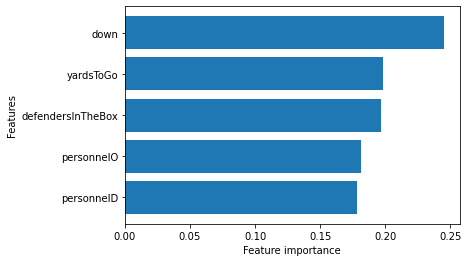

In [41]:
plot_features(X_train.columns, xgb_model.feature_importances_)

## As I thought, isDefensivePI is skewing the results. Let's go back up top, eliminate the category and look again.
Went back and updated the data.

According the feature importance, down and distance has the biggest impact on passResults. This make sense assuming that 3rd and long situations are hard to convert. Nothing revelatory here.

## Need more EDA
Let's look at our original data and re-focus what we are trying to find our with this data.

In [42]:
df_wk1.head(10).T

,0,1,2,3,4,5,6,7,8,9
time,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z
x,91.73,88.89,91.35,86.31,90.78,73.64,98.25,86.48,82.67,84
y,26.67,36.47,44.16,22.01,36.15,28.7,26.63,31.12,20.53,43.49
s,0,0.01,0.02,0.09,0,0.03,0.01,0.09,0.03,0.14
a,0.01,0.01,0.03,0.42,0,0.02,0.01,0.03,0.07,0.05
dis,0.02,0.01,0.01,0.01,0,0.01,0,0.04,0.01,0.01
o,289.57,105.63,290.45,70.12,257.61,103.05,265.88,95.9,81.14,108.23
dir,240.93,66.66,16.86,168.91,193.97,219.41,194.51,33.36,174.57,110.32
event,None,None,None,None,None,None,None,None,None,None
nflId,310,79848,2.49545e+06,2.49561e+06,2.53304e+06,2.53483e+06,2.54358e+06,2.55232e+06,2.55269e+06,2.55538e+06


In [43]:
df_games.head(10).T

,0,1,2,3,4,5,6,7,8,9
gameId,2018090600,2018090901,2018090902,2018090903,2018090900,2018090905,2018090907,2018090906,2018090909,2018090910
gameDate,09/06/2018,09/09/2018,09/09/2018,09/09/2018,09/09/2018,09/09/2018,09/09/2018,09/09/2018,09/09/2018,09/09/2018
gameTimeEastern,20:20:00,13:00:00,13:00:00,13:00:00,13:00:00,13:00:00,13:00:00,13:00:00,16:25:00,16:25:00
homeTeamAbbr,PHI,CLE,IND,MIA,BAL,NE,NYG,NO,ARI,CAR
visitorTeamAbbr,ATL,PIT,CIN,TEN,BUF,HOU,JAX,TB,WAS,DAL
week,1,1,1,1,1,1,1,1,1,1


In [44]:
df_players.head(10).T

,0,1,2,3,4,5,6,7,8,9
nflId,2539334,2539653,2543850,2555162,2555255,2555543,2556445,2507763,2532842,2540158
height,72,70,69,73,75,73,70,6-0,78,77
weight,190,186,186,227,232,216,211,200,243,250
birthDate,1990-09-10,1988-11-01,1991-12-18,1994-11-04,1993-07-01,1995-07-26,1992-10-20,08/01/1986,1989-01-20,1990-11-10
collegeName,Washington,Southeastern Louisiana,Purdue,Louisiana State,Minnesota,Florida,Florida,Mississippi,Arizona,Stanford
position,CB,CB,SS,MLB,OLB,FS,CB,WR,QB,TE
displayName,Desmond Trufant,Robert Alford,Ricardo Allen,Deion Jones,De'Vondre Campbell,Keanu Neal,Brian Poole,Mike Wallace,Nick Foles,Zach Ertz


In [45]:
df_plays.head(10).T

,0,1,2,3,4,5,6,7,8,9
gameId,2018090600,2018090600,2018090600,2018090600,2018090600,2018090600,2018090600,2018090600,2018090600,2018090600
playId,75,146,168,190,256,320,344,402,492,521
playDescription,(15:00) M.Ryan pass short right to J.Jones pus...,(13:10) M.Ryan pass incomplete short right to ...,(13:05) (Shotgun) M.Ryan pass incomplete short...,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,(10:59) (Shotgun) M.Ryan pass incomplete short...,(10:10) (Shotgun) N.Foles pass short left to N...,(9:24) (Shotgun) N.Foles pass incomplete short...,(9:08) M.Ryan pass incomplete deep left to M.S...,(7:01) M.Ryan pass short left to T.Coleman pus...,(6:19) M.Ryan pass short left to A.Hooper to P...
quarter,1,1,1,1,1,1,1,1,1,1
down,1,1,2,3,3,2,3,1,2,1
yardsToGo,15,10,10,10,1,8,4,10,13,10
possessionTeam,ATL,ATL,ATL,ATL,ATL,PHI,PHI,ATL,ATL,ATL
playType,play_type_pass,play_type_pass,play_type_pass,play_type_pass,play_type_pass,play_type_pass,play_type_pass,play_type_pass,play_type_pass,play_type_pass
yardlineSide,ATL,PHI,PHI,PHI,PHI,PHI,PHI,PHI,PHI,PHI
yardlineNumber,20,39,39,39,1,4,8,44,36,10


# Recalculate positive and negative plays with regards to plays.
Not ready to utilize the rest of the data just yet.

### Positive plays would be if the defense prevented a first down or touchdown. playResult is less than yardsToGo.

### Negative plays would be if the offense playResult was more than the yardsToGo.

### Let's seperate the plays into different databases, and get rid of irrelevant data to these criteria.

## Trying to create a Classification problem of whether or not the defense is successful in stopping the offense. And, how did they do it with the data provided. What are the most important features of the data that determined this, and can coaches use this information to make better defensive calls to improve the defense odds of success with similar situations? I.e. 3rd and 8 in the 4th quarter with 90 yards to score.

Irrelevant criteria and why:
* gameId: Looking for commonalities. Specific games and personnel are hard to quantify with the limited data available.
* playId: Because it's not unique across games (numeric), hard to quantify with the limited data available.
* playDescription: Looking for commonalities. Specific plays and personnel are hard to quantify with the limited data available and what we are trying to achieve. Also we're looking for future use, not if a player was a HOFer two years ago.
* possessionTeam: Too specific.
* playType: All of the plays are passes.
* yardlineSide: Relevance? Can't see it for these purposes.
* gameClock: May be relevant, hard to quantify relevance without more information.
* penaltyJerseyNumbers: May only matter if a specific player always gets penalized.
* epa: Expected points added skews results

In [46]:
# First the data reduction
df2_plays = df_plays.drop(["gameId", "playId", "playDescription", "possessionTeam", "playType", "yardlineSide", "gameClock", "penaltyJerseyNumbers", "epa"], axis=1)

df2_plays.head().T

,0,1,2,3,4
quarter,1,1,1,1,1
down,1,1,2,3,3
yardsToGo,15,10,10,10,1
yardlineNumber,20,39,39,39,1
offenseFormation,I_FORM,SINGLEBACK,SHOTGUN,SHOTGUN,SHOTGUN
personnelO,"2 RB, 1 TE, 2 WR","1 RB, 1 TE, 3 WR","2 RB, 1 TE, 2 WR","1 RB, 1 TE, 3 WR","2 RB, 3 TE, 0 WR"
defendersInTheBox,7,7,6,6,8
numberOfPassRushers,4,4,4,5,6
personnelD,"4 DL, 2 LB, 5 DB","4 DL, 2 LB, 5 DB","4 DL, 2 LB, 5 DB","4 DL, 1 LB, 6 DB","6 DL, 3 LB, 2 DB"
typeDropback,TRADITIONAL,TRADITIONAL,TRADITIONAL,SCRAMBLE_ROLLOUT_LEFT,TRADITIONAL


# Create a target (y) category that determines our definition of success.
## Here's a reminder of our definition:
### Positive plays would be if the defense prevented a first down or touchdown. playResult is less than yardsToGo. (1, or True)
### Negative plays would be if the offense playResult was more than the yardsToGo. (0, or False)

In [47]:
# Create the target column
df2_plays["Stopped"] = df2_plays["playResult"] < df2_plays["yardsToGo"]
df2_plays.head().T

,0,1,2,3,4
quarter,1,1,1,1,1
down,1,1,2,3,3
yardsToGo,15,10,10,10,1
yardlineNumber,20,39,39,39,1
offenseFormation,I_FORM,SINGLEBACK,SHOTGUN,SHOTGUN,SHOTGUN
personnelO,"2 RB, 1 TE, 2 WR","1 RB, 1 TE, 3 WR","2 RB, 1 TE, 2 WR","1 RB, 1 TE, 3 WR","2 RB, 3 TE, 0 WR"
defendersInTheBox,7,7,6,6,8
numberOfPassRushers,4,4,4,5,6
personnelD,"4 DL, 2 LB, 5 DB","4 DL, 2 LB, 5 DB","4 DL, 2 LB, 5 DB","4 DL, 1 LB, 6 DB","6 DL, 3 LB, 2 DB"
typeDropback,TRADITIONAL,TRADITIONAL,TRADITIONAL,SCRAMBLE_ROLLOUT_LEFT,TRADITIONAL


# Change Data into Machine Language
Convert string into categories¶

One way we can turn all of our data into numbers is by converting them into pandas categories

In [48]:
for label, content in df2_plays.items():
    if pd.api.types.is_string_dtype(content):
        df2_plays[label] = content.astype("category").cat.as_ordered()

In [49]:
df2_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   quarter                 19239 non-null  int64   
 1   down                    19239 non-null  int64   
 2   yardsToGo               19239 non-null  int64   
 3   yardlineNumber          19239 non-null  int64   
 4   offenseFormation        19098 non-null  category
 5   personnelO              19210 non-null  category
 6   defendersInTheBox       19177 non-null  float64 
 7   numberOfPassRushers     18606 non-null  float64 
 8   personnelD              19210 non-null  category
 9   typeDropback            18600 non-null  category
 10  preSnapVisitorScore     18600 non-null  float64 
 11  preSnapHomeScore        18600 non-null  float64 
 12  absoluteYardlineNumber  18600 non-null  float64 
 13  penaltyCodes            1206 non-null   category
 14  passResult            

In [50]:
# Check the missing data
df2_plays.isnull().sum()/len(df2_plays)

quarter                   0.000000
down                      0.000000
yardsToGo                 0.000000
yardlineNumber            0.000000
offenseFormation          0.007329
personnelO                0.001507
defendersInTheBox         0.003223
numberOfPassRushers       0.032902
personnelD                0.001507
typeDropback              0.033214
preSnapVisitorScore       0.033214
preSnapHomeScore          0.033214
absoluteYardlineNumber    0.033214
penaltyCodes              0.937315
passResult                0.000104
offensePlayResult         0.000000
playResult                0.000000
isDefensivePI             0.000000
Stopped                   0.000000
dtype: float64

In [51]:
df2_plays.isna().sum()

quarter                       0
down                          0
yardsToGo                     0
yardlineNumber                0
offenseFormation            141
personnelO                   29
defendersInTheBox            62
numberOfPassRushers         633
personnelD                   29
typeDropback                639
preSnapVisitorScore         639
preSnapHomeScore            639
absoluteYardlineNumber      639
penaltyCodes              18033
passResult                    2
offensePlayResult             0
playResult                    0
isDefensivePI                 0
Stopped                       0
dtype: int64

In [52]:
# Let's remove the penalty codes and Results Missing 18033.
df3_plays = df2_plays.drop(["penaltyCodes", "passResult", "offensePlayResult", "playResult"], axis=1)

In [53]:
df3_plays.isna().sum()

quarter                     0
down                        0
yardsToGo                   0
yardlineNumber              0
offenseFormation          141
personnelO                 29
defendersInTheBox          62
numberOfPassRushers       633
personnelD                 29
typeDropback              639
preSnapVisitorScore       639
preSnapHomeScore          639
absoluteYardlineNumber    639
isDefensivePI               0
Stopped                     0
dtype: int64

In [54]:
# Fill missing values with median
for label, content in df3_plays.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df3_plays[label] = content.fillna(content.median())

In [55]:
df3_plays.isna().sum()

quarter                     0
down                        0
yardsToGo                   0
yardlineNumber              0
offenseFormation          141
personnelO                 29
defendersInTheBox           0
numberOfPassRushers         0
personnelD                 29
typeDropback              639
preSnapVisitorScore         0
preSnapHomeScore            0
absoluteYardlineNumber      0
isDefensivePI               0
Stopped                     0
dtype: int64

In [56]:
# Turn categorical values into numbers and fill missing
for label, content in df3_plays.items():
    if not pd.api.types.is_numeric_dtype(content):
        df3_plays[label] = pd.Categorical(content).codes+1

In [57]:
df3_plays.isna().sum()

quarter                   0
down                      0
yardsToGo                 0
yardlineNumber            0
offenseFormation          0
personnelO                0
defendersInTheBox         0
numberOfPassRushers       0
personnelD                0
typeDropback              0
preSnapVisitorScore       0
preSnapHomeScore          0
absoluteYardlineNumber    0
isDefensivePI             0
Stopped                   0
dtype: int64

In [58]:
# Split our data into X & y
X = df3_plays.drop("Stopped", axis=1)

y = df3_plays["Stopped"]

In [59]:
X.head().T

,0,1,2,3,4
quarter,1,1,1,1,1
down,1,1,2,3,3
yardsToGo,15,10,10,10,1
yardlineNumber,20,39,39,39,1
offenseFormation,2,6,5,5,5
personnelO,36,20,36,20,39
defendersInTheBox,7,7,6,6,8
numberOfPassRushers,4,4,4,5,6
personnelD,40,40,40,38,54
typeDropback,6,6,6,4,6


In [60]:
y.head().T

0     True
1     True
2     True
3    False
4     True
Name: Stopped, dtype: bool

In [61]:
# Fit the model to the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
# Try Forest Regression
from sklearn.ensemble import RandomForestRegressor

In [63]:
%%time
# Instantiate model
rf_model = RandomForestRegressor(n_jobs=1,
                                random_state=7)

# Fit the model
rf_model.fit(X_train, y_train)

CPU times: user 6.35 s, sys: 0 ns, total: 6.35 s
Wall time: 6.35 s


RandomForestRegressor(n_jobs=1, random_state=7)

In [64]:
# Score the model
rf_model.score(X_train, y_train)

0.8610210682312509

In [65]:
# Check the test set
rf_model.fit(X_test, y_test)

RandomForestRegressor(n_jobs=1, random_state=7)

In [66]:
rf_model.score(X_test, y_test)

0.8601333615954506

## Evaluation function

In [67]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(rf_model):
    train_preds = rf_model.predict(X_train)
    test_preds = rf_model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Test MAE": mean_absolute_error(y_test, test_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Test RMSLE": rmsle(y_test, test_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Test R^2": r2_score(y_test, test_preds)}
    return scores

In [68]:
show_scores(rf_model)

{'Training MAE': 0.42320057176271847,
 'Test MAE': 0.156754158004158,
 'Training RMSLE': 0.32760647931617765,
 'Test RMSLE': 0.13466682086294168,
 'Training R^2': 0.002683165342685756,
 'Test R^2': 0.8601333615954506}

# HyperTune RandomizedSearchCV

In [69]:
%%time
rf_grid ={"n_estimators": np.arange(5,50,10),
         "max_depth": [None, 3,5,10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2),
         "max_features": [0.5,1, "sqrt", "auto"],
         "max_samples": [1000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=1,
                                                   random_state=7),
                             param_distributions=rf_grid,
                             n_iter=50,
                             cv=5,
                             verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 28.9 s, sys: 81.8 ms, total: 29 s
Wall time: 29 s


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   28.8s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=1, random_state=7),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 5, 15, 25, 35, 45])},
                   verbose=True)

In [70]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 35,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_samples': 1000,
 'max_features': 'auto',
 'max_depth': 5}

In [71]:
# Evaluate scores for Random Search CV model
show_scores(rs_model)

{'Training MAE': 0.414622247420832,
 'Test MAE': 0.4202031140886534,
 'Training RMSLE': 0.31880956598285964,
 'Test RMSLE': 0.3222806928212706,
 'Training R^2': 0.0806623457596255,
 'Test R^2': 0.061334582817923367}

## Train a model with the best Hyperparameters
* Note: These were found after 50 iterations.

In [72]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators= 35,
                                    min_samples_split= 18,
                                    min_samples_leaf= 1,
                                    max_samples= 1000,
                                    max_features= 'auto',
                                    max_depth= 5,
                                    random_state=7)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 175 ms, sys: 4.06 ms, total: 179 ms
Wall time: 176 ms


RandomForestRegressor(max_depth=5, max_samples=1000, min_samples_split=18,
                      n_estimators=35, random_state=7)

In [73]:
# Scores for the ideal_model
show_scores(ideal_model)

{'Training MAE': 0.414622247420832,
 'Test MAE': 0.4202031140886534,
 'Training RMSLE': 0.31880956598285964,
 'Test RMSLE': 0.3222806928212706,
 'Training R^2': 0.0806623457596255,
 'Test R^2': 0.061334582817923367}

In [74]:
ideal_model.feature_importances_

array([0.01649136, 0.014911  , 0.40238168, 0.09912552, 0.03481366,
       0.02427993, 0.03950261, 0.02756698, 0.05370789, 0.04607883,
       0.04677554, 0.04883165, 0.08187862, 0.06365472])

# Ideal model Feature Importances

In [75]:
def plot_featuresV2(columns, importances, n=20):
    df3_plays = (pd.DataFrame({"features": columns,
                               "feature_importances": importances})
                 .sort_values("feature_importances", ascending=False)
                 .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df3_plays["features"][:n], df3_plays["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()
    

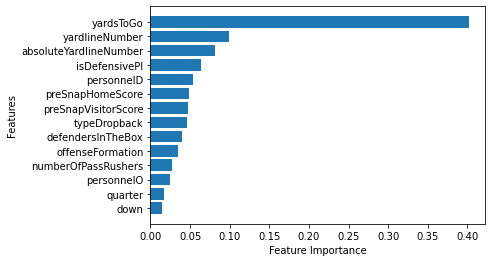

In [76]:
plot_featuresV2(X_train.columns, ideal_model.feature_importances_)

In [77]:
# Let's check XGBoost

xgb2_model = XGBClassifier()
xgb2_model.fit(X,y)

xgb2_model.score(X,y)

0.7727532616040335

In [90]:
ideal_model.score(X, y)

0.07679039504041674

## XGB Boost model is 0.5% more accurate than the ideal_model hypertuned.

(None, None)

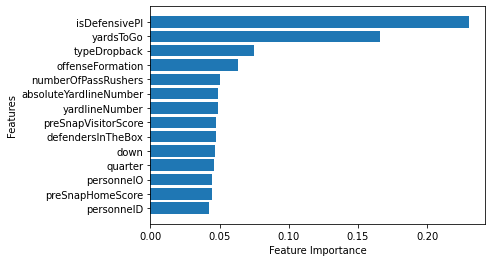

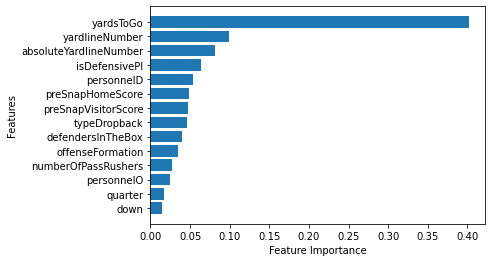

In [85]:
plot_featuresV2(X_train.columns, xgb2_model.feature_importances_), plot_featuresV2(X_train.columns, ideal_model.feature_importances_)

## Synopsis
yardsToGo determine the success rate for the defense. Nothing groundbreaking. Need to start over and re-evaluate how I'm approaching the problem.